 # Amazon Sales Data Analysis using the OSEMN Framework

## PROJECT OVERVIEW

This project follows the **OSEMN Framework**, a structured process for data analysis and data science projects.  
The OSEMN methodology ensures that each step of the analysis — from data collection to interpretation — is performed in a systematic and reproducible way.

### What is the OSEMN Framework?

The OSEMN framework is a well-known data analysis workflow consisting of five key stages such as :

1. **O — Obtain:** Collect or import the dataset and understand its structure.  
2. **S — Scrub:** Clean the data by handling missing values, duplicates, and inconsistent entries.  
3. **E — Explore:** Perform exploratory data analysis (EDA) to discover patterns, relationships, and insights.  
4. **M — Model:** Apply analytical or predictive models to quantify relationships or make predictions.  
5. **N — Interpret:** Translate analytical findings into actionable business or practical insights.


### Project Goal

This notebook aims to analyze Amazon product sales data to uncover insights about product ratings, discounts, and popularity.  
By applying the **OSEMN framework**, the analysis progresses from raw data to meaningful interpretations that can inform business decisions.

Each section of this notebook corresponds to one of the OSEMN stages, clearly marked and explained for transparency and reproducibility.*


## OBTAIN

In this step, we focus on obtaining and exploring the dataset that will be used for our analysis.

The dataset used in this project is the **Amazon Sales Dataset**, which contains information about products sold on Amazon, including details such as product title, category, price, discount percentage, rating, and rating count.  
It was obtained from Kaggle’s public datasets: [Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
print(df.head(3))

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-Wit

In [2]:
print(df.describe)

<bound method NDFrame.describe of       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessori

Dataset is made out of 1465 rows and 16 columns.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

There are 2 null values in our rating_count column and interestingly , every data type is an object.

Let's double check to see null values in the dataset.

In [4]:
print(df.isna().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Let's find out which rows rating_count values are null.

In [5]:
null_mask = df["rating_count"].isna()
null_rows = df[null_mask]
print(null_rows)

     product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             ₹199   
324  Computers&Accessories|Accessories&Peripherals|...             ₹249   

    actual_price discount_percentage rating rating_count  \
282         ₹999                 80%    3.0          NaN   
324         ₹999                 75%    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

           

Rows with index numbers of 282 and 324 has no value in their 'rating_count' column ! Now let's decide what to do with them.

Since we don't have any additional information about the rating count and we can't obtain them from anywhere , let's just leave them out of the dataset.

## SCRUB

Let's start our SCRUB stage by removing the rows with the null values in 'rating_count' column.

Since we already know which rows has null values from the OBTAIN stage let's go ahead and remove them with their respective index numbers.

In [6]:
df = df.drop([282,324], axis = 0)
print(df.isna().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [7]:
df = df.reset_index(drop = True)

Rows with null values are now dropped and every index is now in order. The next step of the SCRUB process will be data type management. As we already know from the OBTAIN step , all attributes of our data is stores as an object even if they should be numerical values. Now let's deal with them !

Generally columns that stores price values are kept as numerical values hence 'discounted_price' and 'actual_price'column should be a numerical data type such as integer or a float. Also this applies to both 'rating' and 'rating_count' column. These columns will be now converted to a numerical data type.

Let's start with 'discounted_price' and 'actual_price' columns. Keep in mind that in order to convert these values in to a numerical data type we need to get rid of the currency symbols.

In [8]:
df["discounted_price"] = df["discounted_price"].str.replace("₹" , "")
df["actual_price"] = df["actual_price"].str.replace("₹" , "")

Commas also should be removed too in order to standardize the numeric data.

In [9]:
df["discounted_price"] = df["discounted_price"].str.replace("," ,"")
df["actual_price"] = df["actual_price"].str.replace("," ,"")

Now we can change them in to floats !

In [10]:
df["discounted_price"] = df["discounted_price"].astype(float)
df["actual_price"] = df["actual_price"].astype(float)

Done ! 'discounted_price' and 'actual_price' columns are now stored as floats. Now let's move on to the 'rating' and 'rating_count' columns.

Unfortunately , we have a misplaced value in our rating column which is '|' . In order to handle this situation the whole row which holds the '|' will be dropped too.

In [11]:
misplaced_rating_value = df.index[df["rating"]=='|']
print(misplaced_rating_value)

Index([1277], dtype='int64')


Row with the index 1277 will be dropped now.

In [12]:
df = df.drop(1277 , axis = 0)

In [13]:
df = df.reset_index(drop = True)

Now we can move on to converting 'rating' column's data type into float.

In [14]:
df["rating"] = df["rating"].astype(float)

Now we will modify 'rating_count' column so we can store the column as a float data type. Let's begin with removing the comma seperators and then change our column in to a float data type.

In [15]:
df["rating_count"] = df["rating_count"].str.replace("," , "")
df["rating_count"] = df["rating_count"].astype(float)

Lastly, 'discount_percentage' column will also be standardized by removing '%' symbol and changing into a float data type.

In [16]:
df["discount_percentage"] = df["discount_percentage"].str.replace("%" ,"")
df["discount_percentage"] = df["discount_percentage"].astype(float)

Now let's check our columns and their information!

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   o

We can see that all needed data columns are now converted into their correct data type!

For the final stage of our SCRUB operation we will make some operations on the category column. Dataset provides us with a very specific categorization so we will generalize this column by changing every data in this column in to their main category. For Example : "Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters" will be changed in to "Computers&Accessories". This data will be stored in a new column named as "column_general".

In [18]:
df["category_general"] = df["category"].str.split("|").str[0]
print(df["category_general"].head(5))

0    Computers&Accessories
1    Computers&Accessories
2    Computers&Accessories
3    Computers&Accessories
4    Computers&Accessories
Name: category_general, dtype: object


Done ! Now we have a column that gives us the general category of the item in our dataset!

## EXPLORE

Our goal in the EXPLORE stage is to find relationships , patterns and trends. We will use descriptive statistics and visualizations to help us achieve our goal.

In [19]:
print(df.describe())

       discounted_price   actual_price  discount_percentage       rating  \
count       1462.000000    1462.000000          1462.000000  1462.000000   
mean        3129.981826    5453.087743            47.672367     4.096717   
std         6950.548042   10884.467444            21.613905     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1670.000000            50.000000     4.100000   
75%         1999.000000    4321.250000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1462.000000  
mean    18307.376881  
std     42766.096572  
min         2.000000  
25%      1191.500000  
50%      5179.000000  
75%     17342.250000  
max    426973.000000  


Summary statistics gives us a quick idea about our dataset's statistics. Let's go ahead and find them for the columns which gives us information about prices!

In [20]:
print("Average Discounted Price :" , round(df["discounted_price"].mean() , 2) , "₹")
print("Average Actual Price :" , round(df["actual_price"].mean() , 2) , "₹")
print("----------------------------")
print("Minimum Discounted Price :" , df["discounted_price"].min() , "₹")
print("Minimum Actual Price :" , df["actual_price"].min() , "₹")
print("----------------------------")
print("Maximum Discounted Price :" , df["discounted_price"].max() ,"₹")
print("Maximum Actual Price :" , df["actual_price"].max() , "₹")
print("----------------------------")
print("Standard Deviation of Discounted Price :" , round(df["discounted_price"].std(ddof = 1) , 2) , "₹")
print("Standard Devation of Actual Price :" , round(df["actual_price"].std(ddof =1) ,2) , "₹")
# Note : ddof parameter is set to 1 since this dataset is only a sample of the whole amazon sales.
print("----------------------------")
print("Median of Discounted Price :" , np.median(df["discounted_price"]) , "₹")
print("Median of Actual Price :" , np.median(df["actual_price"]) , "₹")

Average Discounted Price : 3129.98 ₹
Average Actual Price : 5453.09 ₹
----------------------------
Minimum Discounted Price : 39.0 ₹
Minimum Actual Price : 39.0 ₹
----------------------------
Maximum Discounted Price : 77990.0 ₹
Maximum Actual Price : 139900.0 ₹
----------------------------
Standard Deviation of Discounted Price : 6950.55 ₹
Standard Devation of Actual Price : 10884.47 ₹
----------------------------
Median of Discounted Price : 799.0 ₹
Median of Actual Price : 1670.0 ₹


Done ! 

To do some further analysis , let's find out the average actual price and discounted price values for each product category and analyze the results.

                       actual_price  discounted_price
category_general                                     
Car&Motorbike           4000.000000       2339.000000
Computers&Accessories   1686.659157        845.393836
Electronics            10127.311787       5965.887833
Health&PersonalCare     1900.000000        899.000000
Home&Kitchen            4165.794183       2331.133803
HomeImprovement          799.000000        337.000000
MusicalInstruments      1347.000000        638.000000
OfficeProducts           397.193548        301.580645
Toys&Games               150.000000        150.000000


/tmp/ipykernel_13/844953220.py:1: FutureWarning: The provided callable <function mean at 0x793f6f414b80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_prices_per_category_general = df.groupby("category_general")[["actual_price" , "discounted_price"]].agg(np.mean)


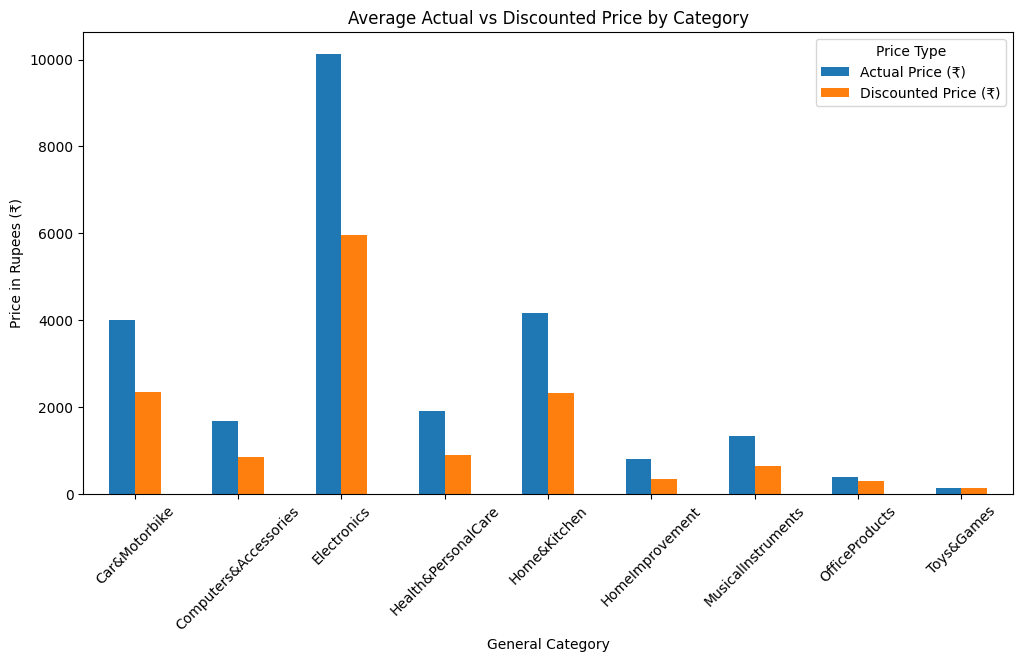

In [21]:
avg_prices_per_category_general = df.groupby("category_general")[["actual_price" , "discounted_price"]].agg(np.mean)
print(avg_prices_per_category_general)

avg_prices_per_category_general = avg_prices_per_category_general.rename(columns={"actual_price": "Actual Price (₹)","discounted_price": "Discounted Price (₹)"})

avg_prices_per_category_general.plot(kind = "bar" , figsize = (12,6))

plt.title("Average Actual vs Discounted Price by Category")
plt.xlabel("General Category")
plt.ylabel("Price in Rupees (₹)")
plt.xticks(rotation = 45)
plt.legend(title = "Price Type")

plt.show()

Bar chart illustrates that highest average prices are in 'Electronics' category and lowest average prices are in 'Toys & Games' category.

Let's also look at the summary statistics of 'rating' and 'rating_count' columns.

In [22]:
print("Average Rating :" , round(df["rating"].mean() , 2))
print("Average Rating Count :" , round(df["rating_count"].mean() , 2))
print("----------------------------")
print("Minimum Rating :" , df["rating"].min())
print("Minimum Rating Count :" , df["rating_count"].min())
print("----------------------------")
print("Maximum Rating :" , df["rating"].max())
print("Maximum Rating Count :" , df["rating_count"].max())
print("----------------------------")
print("Standard Deviation of Rating :" , round(df["rating"].std(ddof=1),2))
print("Standard Deviation of Rating Count :" , round(df["rating_count"].std(ddof=1),2))
print("----------------------------")
print("Median of Rating :" , np.median(df["rating"]))
print("Median of Rating Count :" ,np.median(df["rating_count"]))

Average Rating : 4.1
Average Rating Count : 18307.38
----------------------------
Minimum Rating : 2.0
Minimum Rating Count : 2.0
----------------------------
Maximum Rating : 5.0
Maximum Rating Count : 426973.0
----------------------------
Standard Deviation of Rating : 0.29
Standard Deviation of Rating Count : 42766.1
----------------------------
Median of Rating : 4.1
Median of Rating Count : 5179.0


Done!

Let's find out which product or products has the highest rating count!

In [23]:
max_rating_count = df["rating_count"].max()
print(df[df["rating_count"] == max_rating_count][[ "product_id" , "rating_count"]])

    product_id  rating_count
12  B07KSMBL2H      426973.0
47  B014I8SSD0      426973.0
65  B014I8SX4Y      426973.0


We found out that products with ID'S B07KSMBL2H , B014I8SSD0 , B014I8SX4Y are the products with the highest rating_count in our dataset with a count of 426973. Impressive !

Let's also look at the distribution of products with their respective ratings!

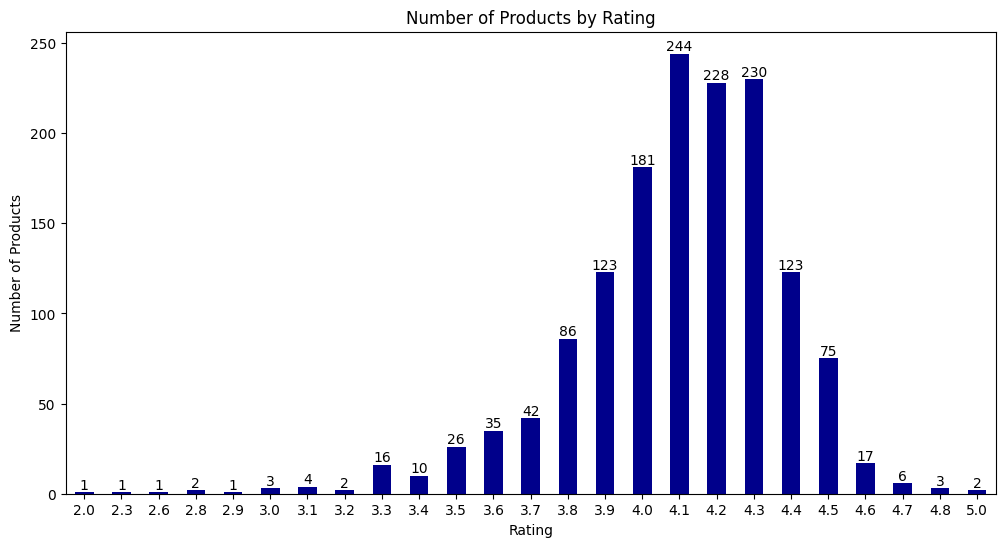

In [24]:
grouped_rating_product_id = df.groupby("rating")["product_id"].count()

ax_2 = grouped_rating_product_id.plot(kind="bar" , figsize=(12,6) , color = "darkblue")

plt.title("Number of Products by Rating")
plt.ylabel("Number of Products")
plt.xlabel("Rating")
plt.xticks(rotation = 0)

# Data Labels
for i in ax_2.containers:
    ax_2.bar_label(i)

plt.show()

Nice! This barplot shows that a huge part of products  in this dataset falls between 4.0 rating and 4.4 rating! 

## MODEL

### Correlation Analysis

In this stage , we will try to find correlations and model them. Let's start by inspecting the relationship between 'rating' and 'discount_percentage'.

In [25]:
corr_dp_rating = df[["rating", "discount_percentage"]].corr()
print(corr_dp_rating)

                       rating  discount_percentage
rating               1.000000            -0.155679
discount_percentage -0.155679             1.000000


We can see that the correlation coefficient is -0.155679 which means that there is a very weak negative correlation rating and discount percentage. This means that higher discounts are slightly associated with lower product ratings, although the relationship is not strong enough to be considered significant.

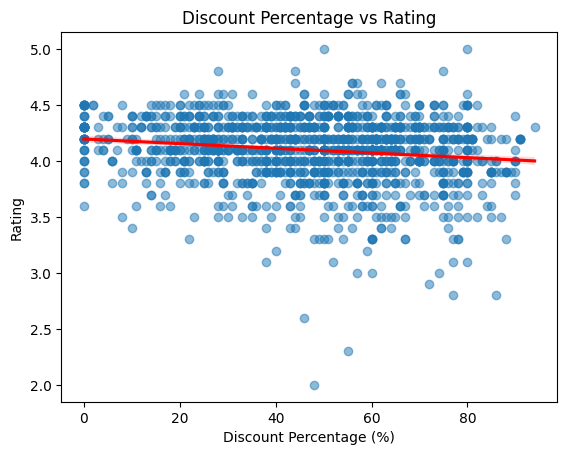

In [26]:
sns.regplot(data=df, x="discount_percentage", y="rating", scatter_kws={"alpha":0.5},line_kws={"color": "red"})

plt.title("Discount Percentage vs Rating")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Rating")

plt.show()


From the regression plot we can also see that there is a slight negative tilt that shows us the slight negative correlation!

Let's also check the relationship between "rating" and "rating_count"

In [27]:
corr_rating_ratingcount = df[["rating", "rating_count"]].corr()
print(corr_rating_ratingcount)

                rating  rating_count
rating        1.000000      0.102235
rating_count  0.102235      1.000000


We can see that the correlation coefficient is 0.102235 , which means that there is a slight positive correlation between rating and count of ratings. We can also say that this suggests that products with a higher number of reviews tend to have slightly higher ratings, although the relationship is not strong enough to be considered significant too.

Let's also visualize this relationship in order to understand it better.

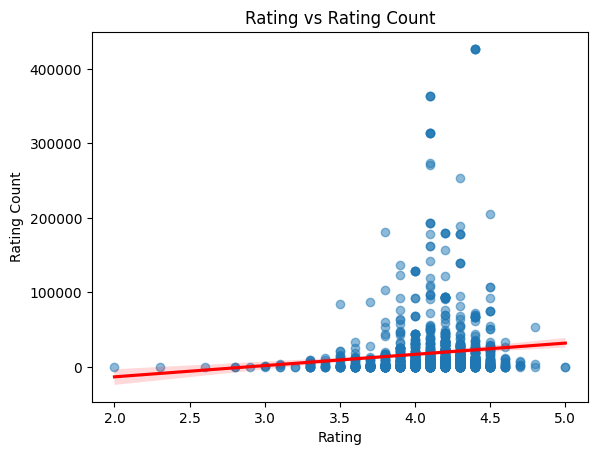

In [28]:
sns.regplot(data=df, x="rating", y="rating_count", scatter_kws={"alpha":0.5},line_kws={"color": "red"})

plt.title("Rating vs Rating Count")
plt.xlabel("Rating")
plt.ylabel("Rating Count")

plt.show()

From the regression plot we can also see that there is a slight positive tilt that shows us the slight positive correlation between ratings and count of ratings!

## INTERPRET

In this section, we interpret the key findings of our amazon sales dataset analysis to understand what the data reveals about customer behavior and product performance on Amazon.

### Relationship between Discount Percentage and Rating

**Correlation:** `r = -0.15` (Very weak negative correlation)

- There is a very weak negative relationship between the discount percentage and the product rating.  
- This suggests that products with higher discounts tend to have slightly lower ratings.  
- It could indicate that heavily discounted products may be of lower perceived quality or part of older stock.  
- However, since the relationship is weak, discount rate alone does not strongly influence customer satisfaction.

**Insight:**  
Discount strategies might not directly improve how customers rate products.  
Businesses should focus on maintaining product quality and only use discounts strategically.


2. Relationship between Rating Count and Average Rating

**Correlation:** `r = 0.10` (Very weak positive correlation)

- There is a very weak positive correlation between the number of ratings and the average product rating.  
- This indicates that products with more reviews tend to have slightly higher ratings, but the effect is minimal.  
- It suggests that popular products receive marginally better feedback, though other factors likely play a larger role in customer satisfaction.

**Insight:**  
Encouraging more customers to leave reviews can help increase trust and visibility of products,  
but the number of reviews alone does not determine high ratings.


### Overall Interpretation

- Discount percentage and rating have a **very weak negative** relationship.  
- Rating count and rating have a **very weak positive** relationship.  
- Neither variable shows a strong predictive power for product ratings
